Import Libraries

In [36]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt
from gdal_interfaces import GDALTileInterface, GDALInterface

# Setup Data folder and GDAL Interface parameter with tiling)
- dirpath: path to the directory where datasets subfolder is stored
- elevation_path: path to folder containing elevation tiles
- landcover_path: path to folder containing landcover tiles

In [37]:
dirpath = "/Users/aakash/Desktop/MTP2/exp/"

elevation_path = dirpath + "elevation"
landcover_path = dirpath + "landcover"
elevation_summary_path = elevation_path + "/elevation_summary.json"
landcover_summary_path = landcover_path + "/landcover_summary.json"

ALWAYS_REBUILD_SUMMARY = False
OPEN_INTERFACES_SIZE = 8

In [38]:
elevation_data_interface = GDALTileInterface(elevation_path, elevation_summary_path, OPEN_INTERFACES_SIZE)
landcover_data_interface = GDALTileInterface(landcover_path, landcover_summary_path, OPEN_INTERFACES_SIZE)

if elevation_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    elevation_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    elevation_data_interface.create_summary_json()
    
if landcover_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    landcover_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    landcover_data_interface.create_summary_json()

Re-using existing summary JSON
Building spatial index ...
Re-using existing summary JSON
Building spatial index ...


Boundary Box

In [39]:
# # manali (hanuman tibba - manali)
# lat1, lon1 = 32.372571, 76.983637
# lat2, lon2 = 32.189737, 77.315875

# palan - sosan 
lat1, lon1 = 32.537047, 76.554121
lat2, lon2 = 31.924304, 77.535921

resolution = 70

Elevation Matrix

In [40]:
elevation_map, landcover_map = getGrayLevelMatrixFromDataSet(lon1, lat1, lon2, lat2, elevation_data_interface, landcover_data_interface, resolution)

start:  32.537047 76.554121
end:  31.924304 77.535921
shape:  974 1316


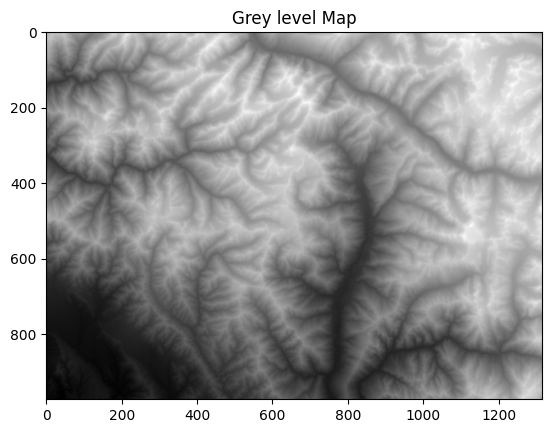

In [41]:
plt.imshow(elevation_map,cmap='gray')
plt.title('Grey level Map')
plt.show()

In [42]:
print("Elevation Map Info")
print(f"Gray Map Shape: {elevation_map.shape}")
print(f"Min: {elevation_map.min()}")
print(f"Max: {elevation_map.max()}")

Elevation Map Info
Gray Map Shape: (974, 1316)
Min: 594
Max: 6149


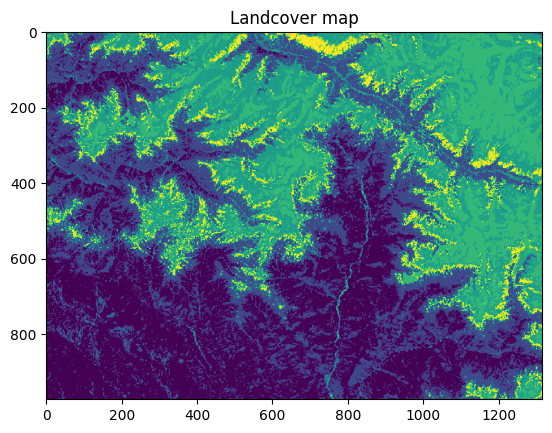

In [43]:
plt.imshow(landcover_map)
plt.title('Landcover map')
plt.show()

In [9]:
# import seaborn as sns
# sns.heatmap(landcover_map)

Source and Destination

In [44]:
n,m = elevation_map.shape

# src_lat, src_lon = 32.216951, 77.231191
# des_lat, des_lon = 32.341876, 77.040854

# palan
src_lat, src_lon = 32.369789, 76.766289
des_lat, des_lon = 32.076790, 77.312516

src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)

Two Binary Maps: Source and Destination

In [45]:
bin_map_start = initBinMap(src_latIdx, src_lonIdx, n, m)   
bin_map_end = initBinMap(des_latIdx, des_lonIdx, n, m)

Single Source Distance Transform

In [46]:
accuracy = 0.0001
alpha = 0
h_weight = 0.25
slope = 20
parentMat = applyDistTfSingleSource(elevation_map, landcover_map, bin_map_start, accuracy, alpha,h_weight,resolution,slope)

Applying Distance transform single image......


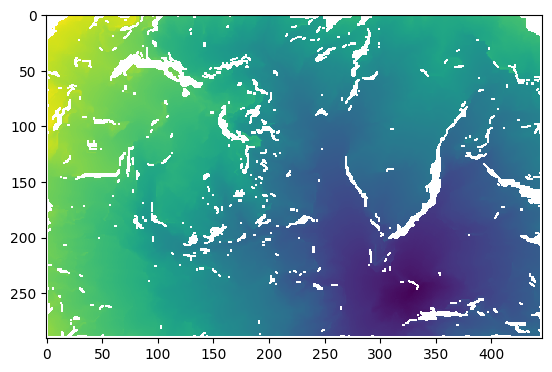

In [34]:
plt.imshow(bin_map_start)

Results

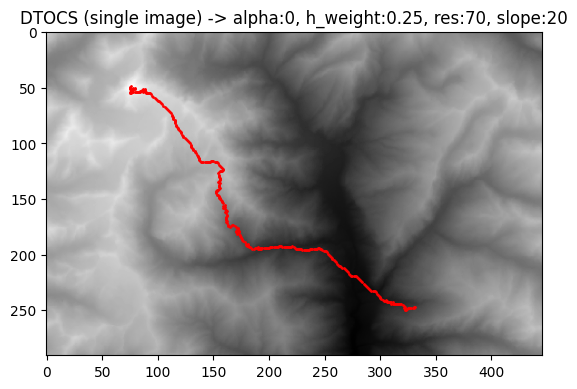

In [35]:
showPathUsingParents(elevation_map, parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)